# Smoothing Spatial Filters

### 1. Function `imfilter`

#### The toolbox implements linear spatial filtering using function `imfilter`, which has the following syntax:

g = imfilter(f, w, filtering_mode, boundary_options, size_options)

#### where $f$ is the input image, $w$ is the filter mask, $g$ is the filtered result, and the other parameters are summarized in table.

|Parameter|Content||
|:-:|:-:|:-:|
|filtering_mode|'corr'|default|
|filtering_mode|'conv'||
|boundary_options|P|default|
|boundary_options|'replicate'||
|boundary_options|'symmertric'||
|boundary_options|'circular'||
|size_option|'full'||
|size_option|'same'|default|

#### The `filtering_mode` specified as `'corr'` for correlation (this is the default) or as `'conv'` for convolution.

#### The `boundary_options` deal with the border-padding issue, with the size of the border being determined by the size of the filter.

#### The `size_options` are either `'same'` or `'full'`.

#### The most common syntax for `imfilter` is

g = imfilter(f, w, 'replicate')

#### The syntax is used when implementing standard linear spatial filters in the toolbox.

#### When working with filters that are neither pre-rotated nor symmetric, and we wish to perform convolution, we have two options. One is to use the syntax

g = imfilter(f, w, 'conv', 'replicate')

#### The other approach is to use function `rot90(w, 2)` to rotate $w$ by 180°, and then use `imfilter(f, w, 'replicate')`. The two steps can be combined into one:

g = imfilter(f, rot90(w, 2), 'replicate')

### 2. Function `fspecial`

#### The toolbox supports a number of predefined 2_D linear spatial filters, obtained by using function `fspecial`, which generates a filter mask, $w$, using the syntax

w = fspecial('type', parameters)

#### where `'type'` specifies the filter type, and `parameters` further define the specified filter. The spatial filters that `fspecial` can generate are summarized in table below, including applicable parameters for each filter.

|type|parameters||
|:-:|:-:|:-|
|'average'|[r c]|A rectangular averaging filter of size $r\times c$|
|'disk'|r|A circular averaging filter|
|'gaussian'|[r c], sig|A Gaussian lowpass filter|
|'laplacian'|alpha|A $3\times 3$ Laplacian filter|
|'log'|[r c], sig|Laplacian of a Gaussian filter|
|'sobel'||Outputs a $3\times 3$ Sobel filter|
|'unsharp'|alpha|Outputs a $3\times 3$ unsharp filter|

### Example 1: Image smoothing with masks of various sizes.

#### The effects of smoothing as a function of filter size are illustrated in the following figures, which shows an original image and the corresponding smoothed results obtained using square averaging filters of size $m=3,5,9,15,35$ pixels, respectively.

#### The original image

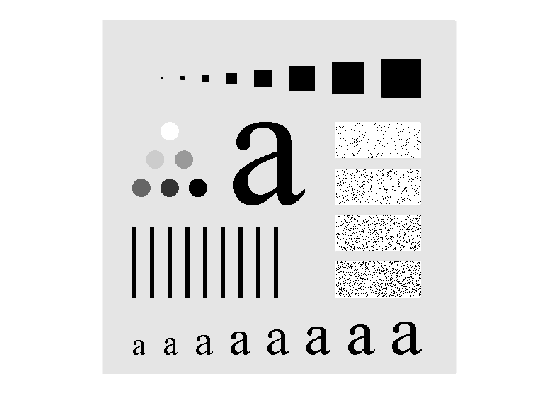

In [1]:
f = imread('Fig0313(a).tif');
imshow(f);

#### Then, we generate rectangular averaging filters $w$, and apply the $w$ to image $f$:

#### $m=3$

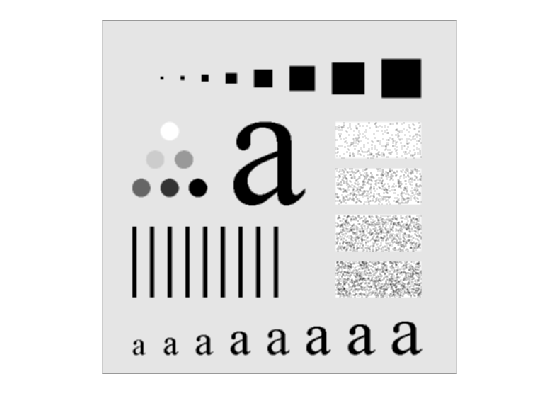

In [2]:
w3 = fspecial('average', [3 3]);
g3 = imfilter(f, w3);
figure, imshow(g3)

#### $m=5$

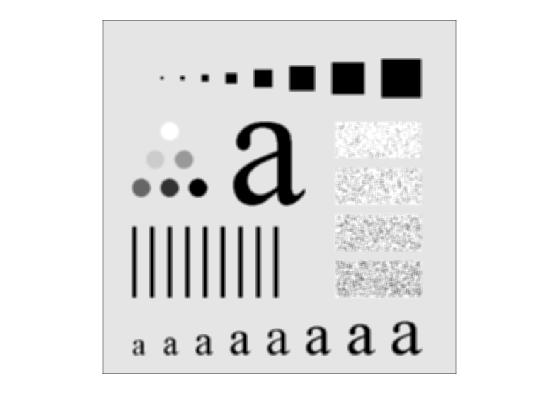

In [3]:
w5 = fspecial('average', [5 5]);
g5 = imfilter(f, w5);
figure, imshow(g5)

#### $m=9$

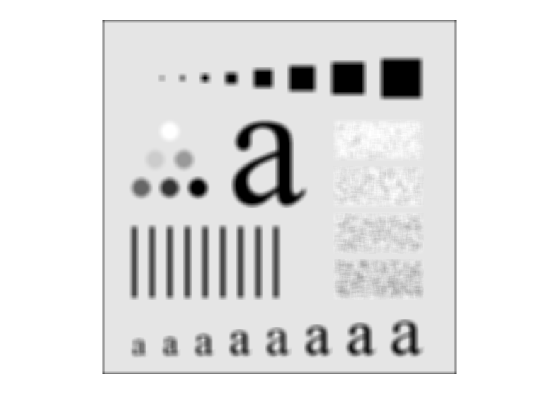

In [4]:
w9 = fspecial('average', [9 9]);
g9 = imfilter(f, w9);
figure, imshow(g9)

#### $m=15$

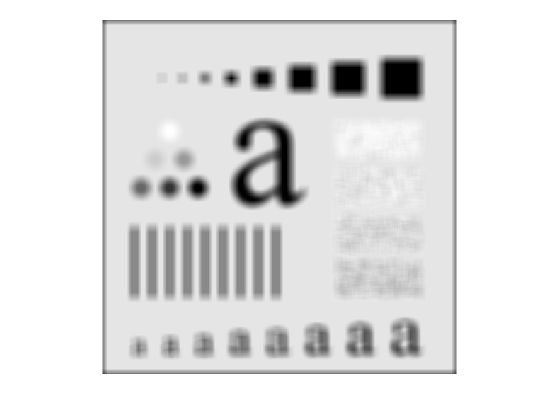

In [5]:
w15 = fspecial('average', [15 15]);
g15 = imfilter(f, w15);
figure, imshow(g15)

#### $m=35$

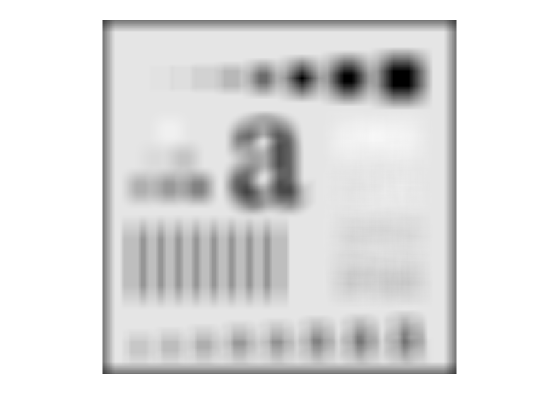

In [6]:
w35 = fspecial('average', [35 35]);
g35 = imfilter(f, w35);
figure, imshow(g35)

### Example 2: Image filtering with averaging mask.

#### The original image

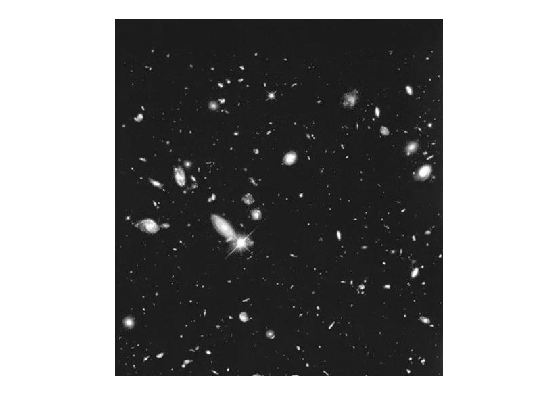

In [13]:
f = imread('Fig0334(a).tif');
imshow(f);

#### Then we apply $15\times 15$ averaging mask to image $f$

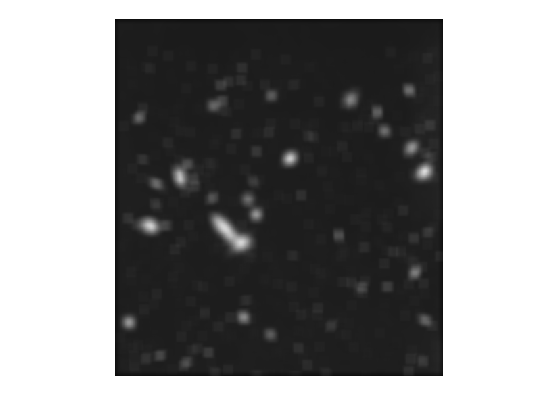

In [16]:
w = fspecial('average', [15 15]);
g = imfilter(f, w);
figure, imshow(g);

#### We see that a number of objects have either blended with the background or their intensity has diminished considerably.

#### Now, we use a threshold value equal to 25% of the highest intensity in the blurred image is shown below. Comparing this result with the original image, we see that it is a reasonable representation of what we would consider to be the largest, brighest objects in that image.

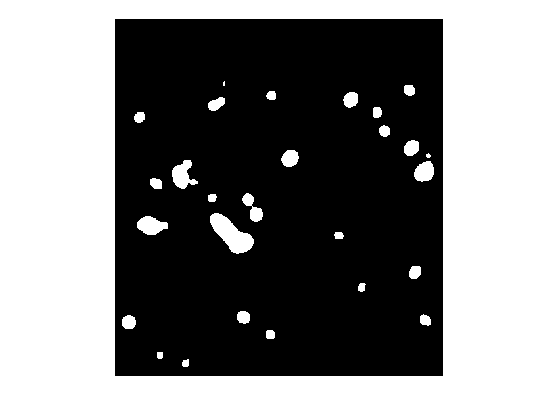

In [17]:
bw = im2bw(g, 0.25);
figure, imshow(bw);

### 3. Function `imnoise`

#### The Image Processing Toolbox uses function `imnoise` to corrupt an image with noise. This function has the basic syntax

g = imnoise(f, type, parameters)

#### where $f$ is the input image, and `type` and `parameters` are as explained below. Function `imnoise` converts the input image to class `double` in the range $[0,1]$ before adding noise to it. The syntax forms for this function are:

g = imnoise(f, 'gaussian', m, var)

#### adds Gaussian noise of mean $m$ and variance $var$ to image $f$. The default is zero mean noise with 0.01 variance.

### 4. Function `medfilt2`

#### The toolbox provides a specialized implementation of 2D median filter.

g = medfilt2(f, [m n], padopt)

#### where the tuple `[m n]` defines a neighborhood of size $m\times n$ over which the median is computed, and `padopt` specifies one of three possible border padding options: `'zeros'` (the default), `'symmetric'` in which $f$ is extended symmetrically by mirror-reflecting it across its border, and `'indexed'`, in which $f$ is padded with 1s if it is of class `double` and with 0s otherwise.

### Example 3: Adaptive median filtering.

#### The original image is a circuit board image, $f$.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



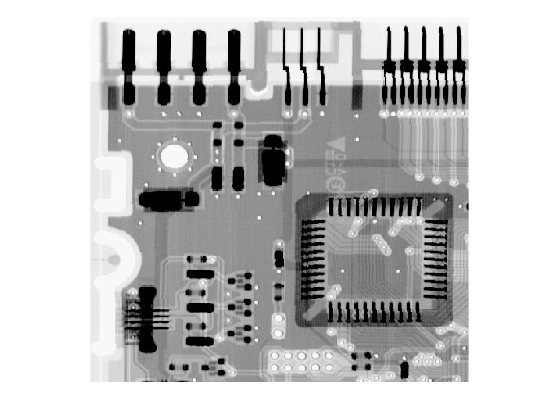

In [7]:
f = imread('Fig0406(a).tif');
imshow(f);

#### $g$ is an image corrupted by salt-and-pepper noise generated using the command

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



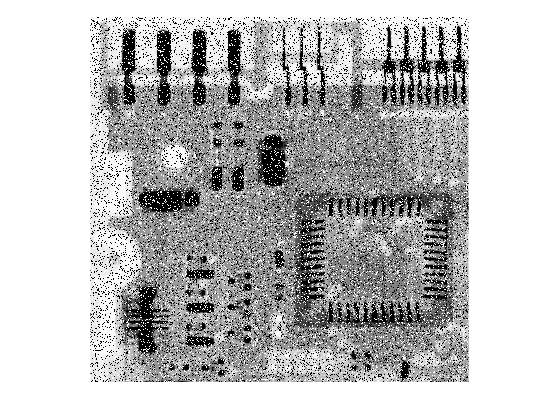

In [9]:
g = imnoise(f, 'salt & pepper', 0.25);
figure, imshow(g);

#### Next figure shows the result obtained using the command

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



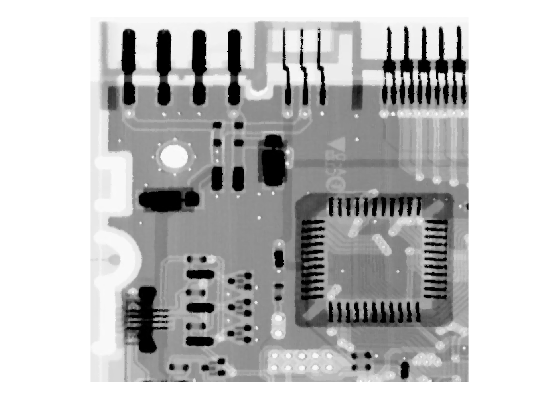

In [10]:
f1 = medfilt2(g, [7 7], 'symmetric');
figure, imshow(f1);

#### This image is reasonably free of noise, but it is quite blurred and distorted.

#### On the other hand, the next command yielded the next image, which is also reasonably free of noise, but is considerably less blurred and distorted.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



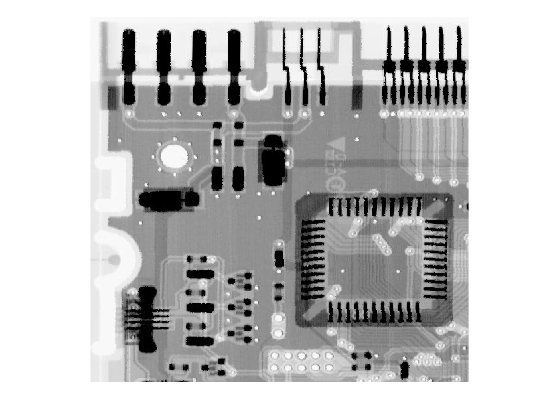

In [11]:
f2 = adpmedian(g, 7);
figure, imshow(f2);